In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import scipy.stats as stats
import scikitplot as skplt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix,f1_score, roc_curve, precision_score, recall_score, precision_recall_curve, classification_report
pd.pandas.set_option('display.max_columns', None)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [2]:
df=pd.read_excel("Train_dataset.xlsx")
test=pd.read_excel("Test_dataset.xlsx")

In [3]:
df.head(5)

,people_ID,Region,Gender,Designation,Name,Married,Children,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,Age,Coma score,Pulmonary score,cardiological pressure,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob
0,1,Bhubaneshwar,Female,Mrs,mansi,YES,1.0,Farmer,Public,2,0,Hypertension,68,8,<400,Normal,441.0,154.0,93.0,233.0,82.0,58.0,27,7,3600000.0,1300000,2.0,49.135010
1,2,Bhubaneshwar,Female,Mrs,riya masi,YES,2.0,Farmer,Walk,2,0,Diabetes,64,15,<100,Stage-02,NaN,121.0,56.0,328.0,89.0,68.0,5,6,1600000.0,400000,1.0,51.147880
2,3,Bhubaneshwar,Female,Mrs,sunita,NO,1.0,Cleaner,Public,2,0,None,19,13,<300,Elevated,416.0,124.0,137.0,213.0,77.0,43.0,40,6,3400000.0,900000,1.0,73.224000
3,4,Bhubaneshwar,Female,Mrs,anjali @ babli,YES,1.0,Driver,Car,2,0,Coronary Heart Disease,33,9,<200,Stage-01,410.0,98.0,167.0,275.0,64.0,60.0,27,7,700000.0,2300000,1.0,48.779225
4,5,Bhubaneshwar,Female,Mrs,champa karketta,NO,2.0,Manufacturing,Car,2,0,Diabetes,23,7,<400,Normal,390.0,21.0,153.0,331.0,71.0,64.0,32,7,3200000.0,1100000,1.0,87.868800


In [4]:
df.tail(5)

,people_ID,Region,Gender,Designation,Name,Married,Children,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,Age,Coma score,Pulmonary score,cardiological pressure,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob
10709,22691,Bengaluru,Male,Mr,ashish,NO,2.0,Business,Car,8,2,Diabetes,20,14,<400,Normal,134.0,67.0,24.0,209.0,61.0,56.0,35,7,4000000.0,300000,0.0,41.981760
10710,22692,Bengaluru,Male,Mr,mohd mujahid ansari,YES,0.0,Manufacturing,Car,8,2,None,42,4,<400,Normal,387.0,102.0,134.0,211.0,65.0,47.0,35,7,1500000.0,700000,NaN,47.148663
10711,22693,Bengaluru,Male,Mr,munnakumar,YES,0.0,Clerk,Public,8,2,Diabetes,59,3,<100,Stage-02,177.0,111.0,151.0,296.0,87.0,37.0,16,5,3000000.0,2100000,2.0,47.708533
10712,22694,Bengaluru,Male,Mr,prakash,YES,1.0,Legal,Walk,8,2,Coronary Heart Disease,49,6,<300,Elevated,352.0,140.0,110.0,253.0,56.0,70.0,28,5,2900000.0,700000,1.0,53.803565
10713,22695,Bengaluru,Male,Mr,mehboob mehandi,NO,2.0,Business,Car,8,2,Diabetes,17,7,<400,Normal,181.0,65.0,134.0,201.0,82.0,60.0,4,3,2100000.0,1400000,0.0,68.342400


In [5]:
test.head(5)

,people_ID,Region,Gender,Designation,Name,Married,Children,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,Age,Coma score,Pulmonary score,cardiological pressure,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month
0,5942,Delhi,Female,Mrs,smt rekha prajapat,YES,2,Driver,Public,4,1,Diabetes,52,3,<200,Stage-01,388,153,196,240,85,53,17,3,3900000,1300000,1
1,18664,Delhi,Male,Mr,nirmal,YES,2,Legal,Walk,4,1,Diabetes,53,11,<200,Stage-01,409,95,138,241,81,61,2,5,1800000,1300000,1
2,5603,Delhi,Female,Mrs,pinky,YES,2,Sales,Car,4,1,Diabetes,35,9,<100,Stage-02,440,40,166,236,88,47,24,3,5000000,2000000,2
3,5649,Delhi,Female,Mrs,pooja @aafrin,YES,2,Sales,Car,4,1,None,31,12,<300,Elevated,206,78,83,211,87,52,13,6,3100000,600000,2
4,5099,Delhi,Female,Mrs,anjali,YES,2,Business,Car,4,1,Diabetes,51,6,<200,Stage-01,229,109,207,312,94,68,39,5,2300000,1500000,1


In [6]:
test.tail(5)

,people_ID,Region,Gender,Designation,Name,Married,Children,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,Age,Coma score,Pulmonary score,cardiological pressure,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month
14493,23737,Thiruvananthapuram,Male,Mr,hanuman sing,YES,0,Cleaner,Walk,11,2,Coronary Heart Disease,55,5,<400,Normal,417,16,36,346,66,45,34,3,4200000,800000,2
14494,11171,Thiruvananthapuram,Female,Mrs,gurupreet kaur @ nainsi,YES,0,Clerk,Car,11,2,None,44,4,<300,Elevated,199,22,29,278,94,37,23,6,4500000,1800000,2
14495,23243,Thiruvananthapuram,Male,Mr,sonu pandey,YES,0,Business,Public,11,2,None,46,6,<300,Elevated,161,15,28,294,73,56,6,6,4300000,800000,1
14496,11199,Thiruvananthapuram,Female,Mrs,nikky,YES,0,Driver,Car,11,2,Coronary Heart Disease,34,5,<200,Stage-01,174,31,24,227,83,60,32,7,2400000,1800000,2
14497,10787,Thiruvananthapuram,Female,Mrs,saroj,YES,0,Driver,Public,11,2,Diabetes,27,4,<200,Stage-01,126,16,63,282,80,59,15,4,1400000,1000000,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10714 entries, 0 to 10713
Data columns (total 28 columns):
people_ID                 10714 non-null int64
Region                    10714 non-null object
Gender                    10714 non-null object
Designation               10714 non-null object
Name                      10694 non-null object
Married                   10714 non-null object
Children                  10403 non-null float64
Occupation                9967 non-null object
Mode_transport            10711 non-null object
cases/1M                  10714 non-null int64
Deaths/1M                 10714 non-null int64
comorbidity               10488 non-null object
Age                       10714 non-null int64
Coma score                10714 non-null int64
Pulmonary score           10714 non-null object
cardiological pressure    10617 non-null object
Diuresis                  9998 non-null float64
Platelets                 9790 non-null float64
HBB                       10698 

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14498 entries, 0 to 14497
Data columns (total 27 columns):
people_ID                 14498 non-null int64
Region                    14498 non-null object
Gender                    14498 non-null object
Designation               14498 non-null object
Name                      14466 non-null object
Married                   14498 non-null object
Children                  14498 non-null int64
Occupation                14498 non-null object
Mode_transport            14498 non-null object
cases/1M                  14498 non-null int64
Deaths/1M                 14498 non-null int64
comorbidity               14498 non-null object
Age                       14498 non-null int64
Coma score                14498 non-null int64
Pulmonary score           14498 non-null object
cardiological pressure    14498 non-null object
Diuresis                  14498 non-null int64
Platelets                 14498 non-null int64
HBB                       14498 non

In [9]:
df.isnull().sum()

people_ID                    0
Region                       0
Gender                       0
Designation                  0
Name                        20
Married                      0
Children                   311
Occupation                 747
Mode_transport               3
cases/1M                     0
Deaths/1M                    0
comorbidity                226
Age                          0
Coma score                   0
Pulmonary score              0
cardiological pressure      97
Diuresis                   716
Platelets                  924
HBB                         16
d-dimer                   1114
Heart rate                1114
HDL cholesterol             35
Charlson Index               0
Blood Glucose                0
Insurance                 1090
salary                       0
FT/month                   723
Infect_Prob                  0
dtype: int64

In [10]:
test.isnull().sum()

people_ID                  0
Region                     0
Gender                     0
Designation                0
Name                      32
Married                    0
Children                   0
Occupation                 0
Mode_transport             0
cases/1M                   0
Deaths/1M                  0
comorbidity                0
Age                        0
Coma score                 0
Pulmonary score            0
cardiological pressure     0
Diuresis                   0
Platelets                  0
HBB                        0
d-dimer                    0
Heart rate                 0
HDL cholesterol            0
Charlson Index             0
Blood Glucose              0
Insurance                  0
salary                     0
FT/month                   0
dtype: int64

In [11]:
df["Region"].value_counts()

Chennai         2581
Bengaluru       2573
Chandigarh      2563
Bhubaneshwar    2537
Delhi            460
Name: Region, dtype: int64

In [12]:
test["Region"].value_counts()

Pune                  2503
Thiruvananthapuram    2502
Kolkata               2483
Mumbai                2475
Hyderabad             2457
Delhi                 2078
Name: Region, dtype: int64

#### Region var have different values execpt delhi 

In [13]:
df.drop(["people_ID", 'Region','Designation', 'Name'], axis=1, inplace=True)
test.drop(['Region','Designation', 'Name'], axis=1, inplace=True)

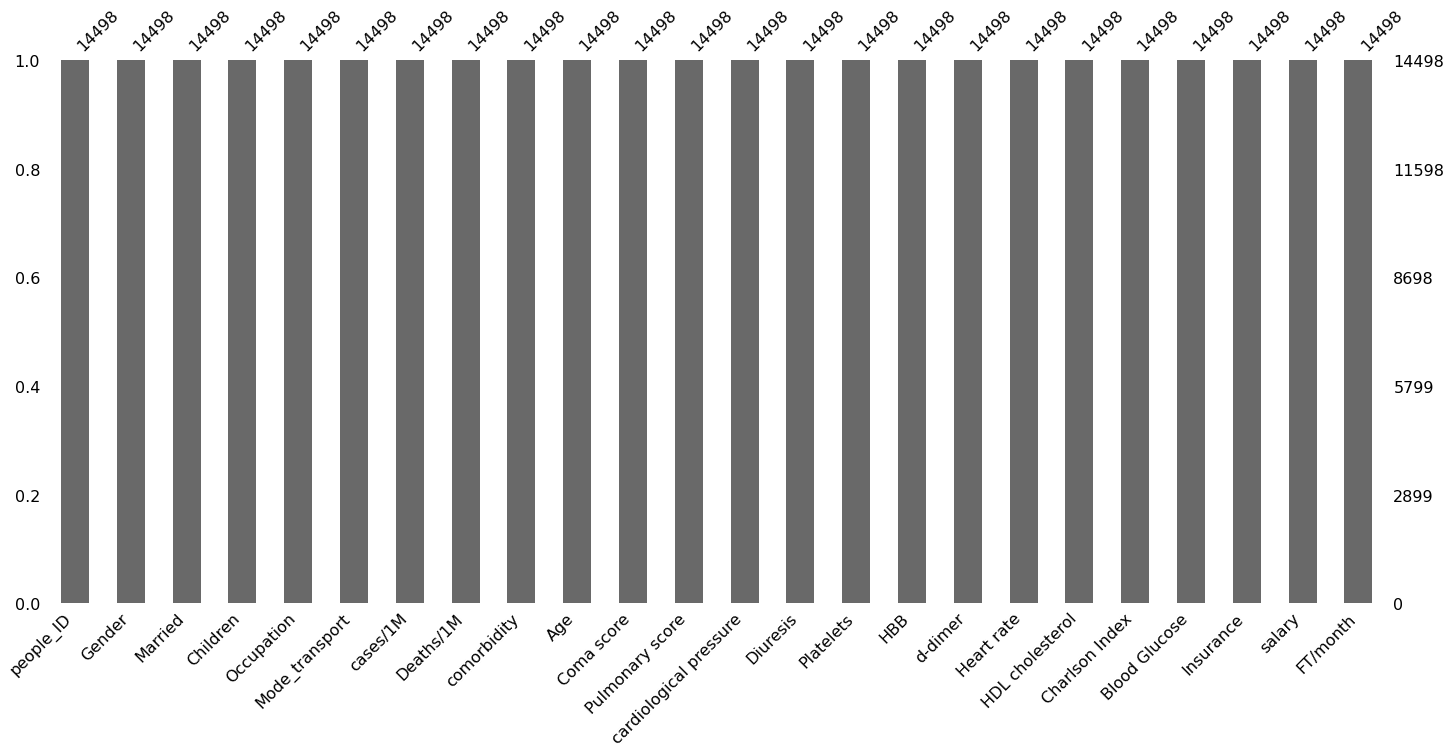

In [14]:
msno.bar(test)

#### our test dataset not contain null values

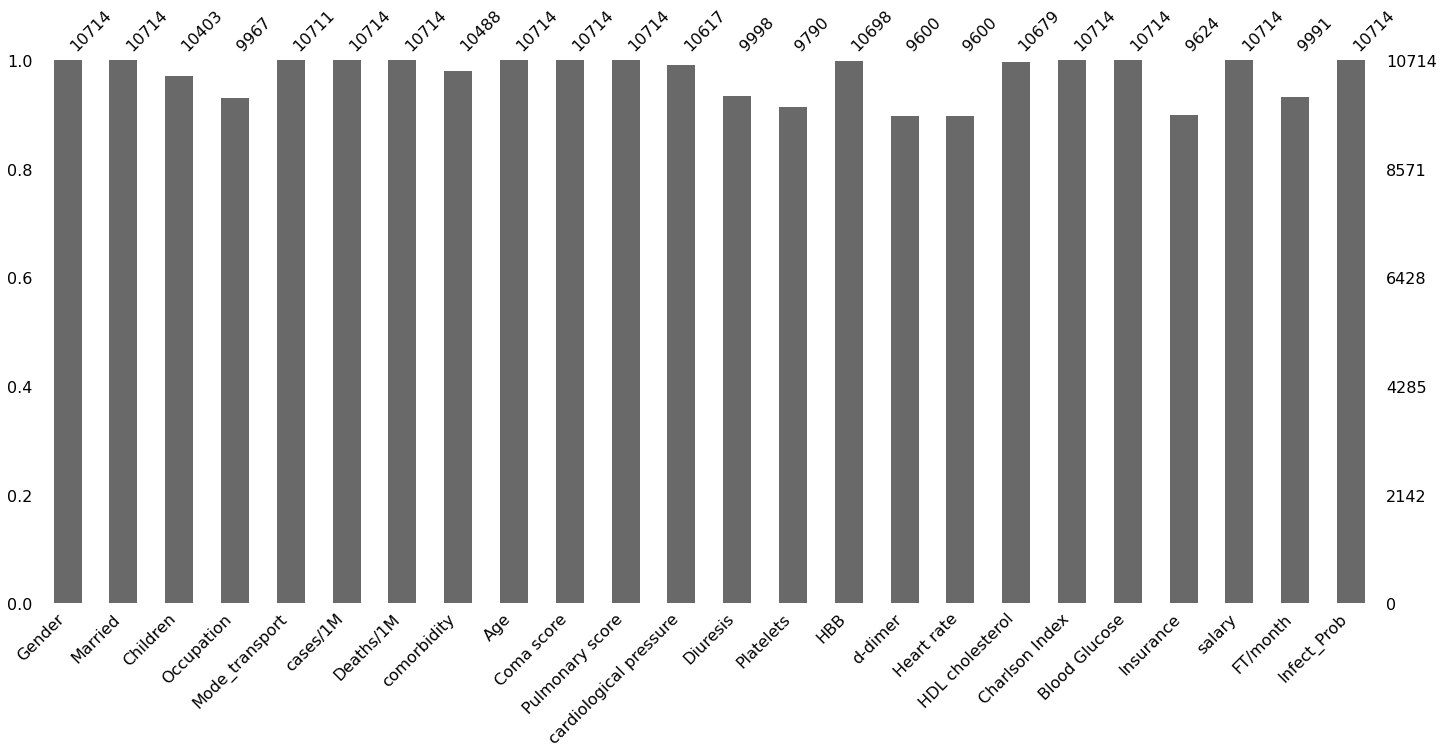

In [15]:
msno.bar(df)

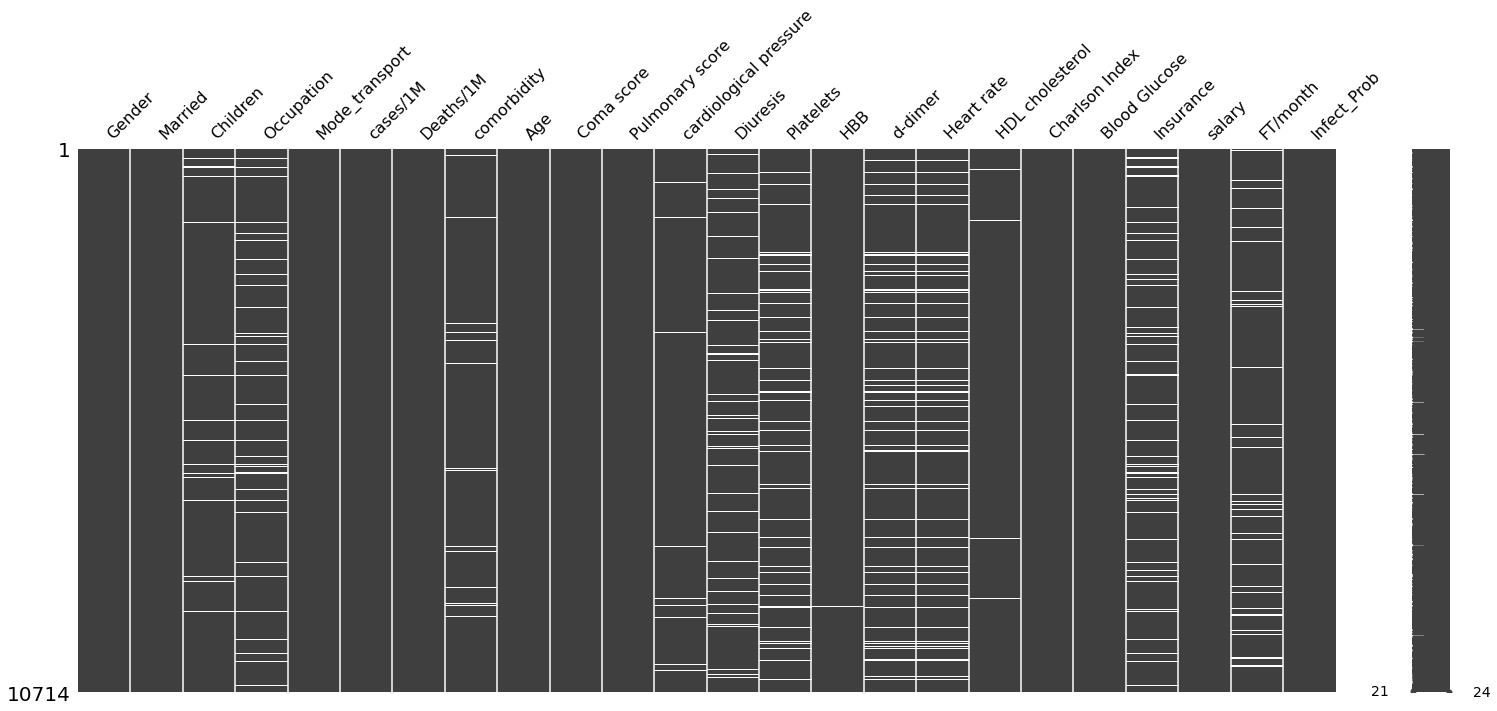

In [16]:
msno.matrix(df)

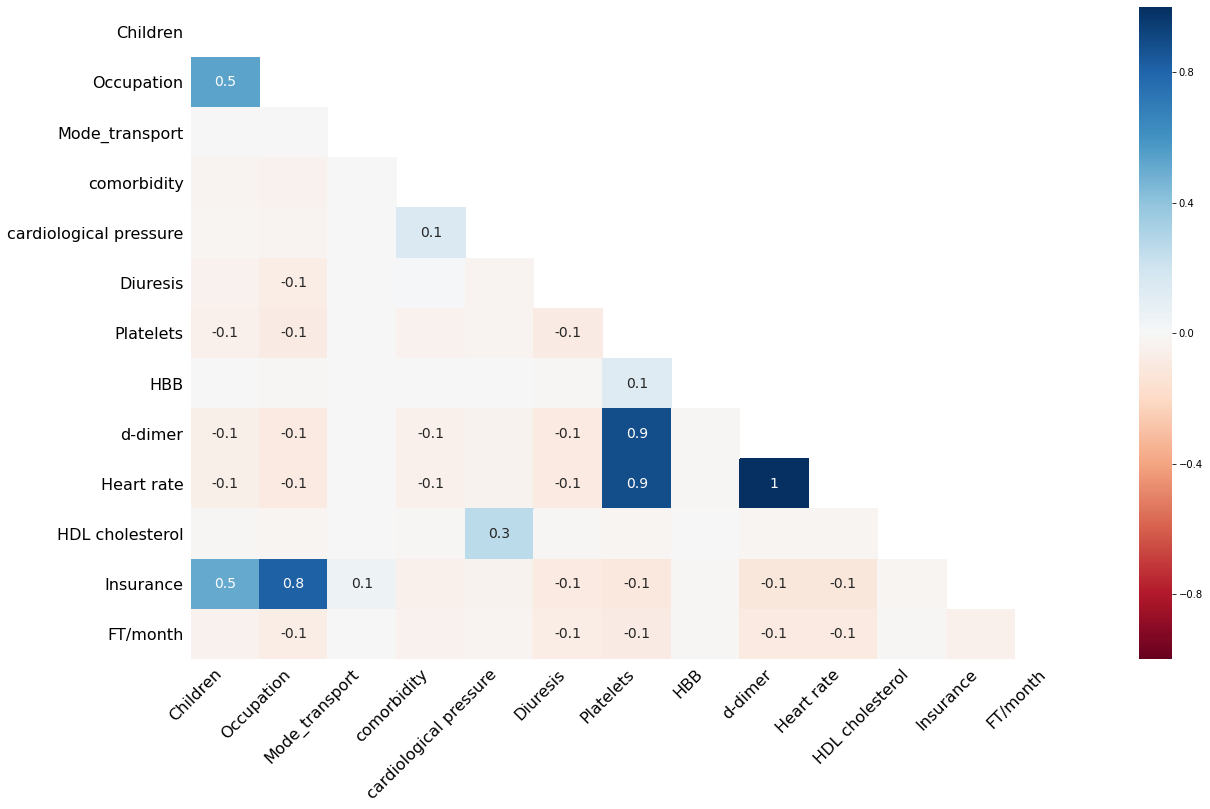

In [17]:
msno.heatmap(df)

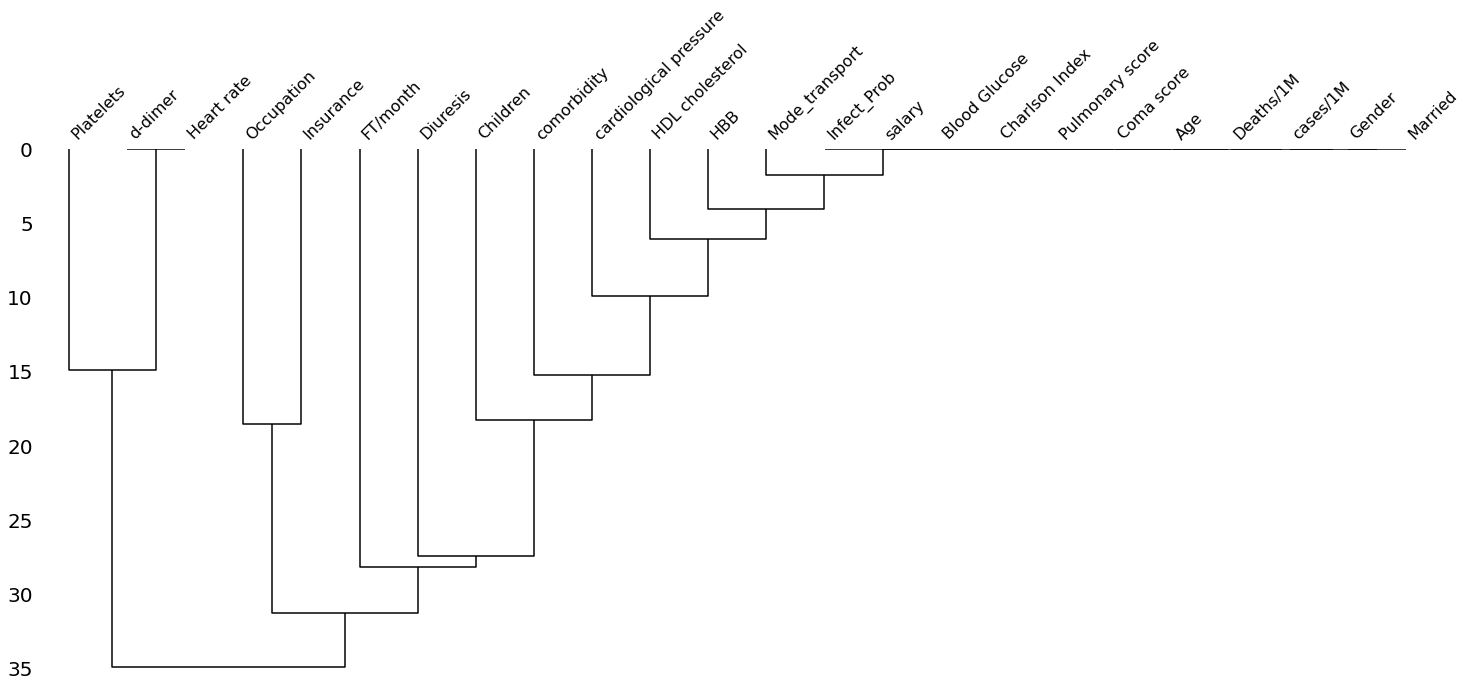

In [18]:
msno.dendrogram(df)

In [19]:
df["target"] = np.where (df['Infect_Prob'] >=50.0,1,0)
df.drop("Infect_Prob", axis=1, inplace=True)

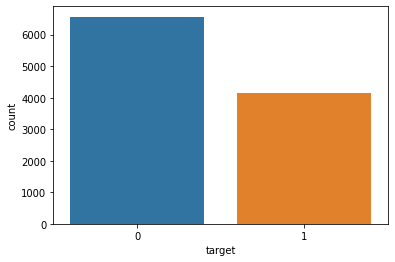

In [20]:
sns.countplot(df["target"])

In [21]:
df.head(5)

,Gender,Married,Children,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,Age,Coma score,Pulmonary score,cardiological pressure,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,target
0,Female,YES,1.0,Farmer,Public,2,0,Hypertension,68,8,<400,Normal,441.0,154.0,93.0,233.0,82.0,58.0,27,7,3600000.0,1300000,2.0,0
1,Female,YES,2.0,Farmer,Walk,2,0,Diabetes,64,15,<100,Stage-02,NaN,121.0,56.0,328.0,89.0,68.0,5,6,1600000.0,400000,1.0,1
2,Female,NO,1.0,Cleaner,Public,2,0,None,19,13,<300,Elevated,416.0,124.0,137.0,213.0,77.0,43.0,40,6,3400000.0,900000,1.0,1
3,Female,YES,1.0,Driver,Car,2,0,Coronary Heart Disease,33,9,<200,Stage-01,410.0,98.0,167.0,275.0,64.0,60.0,27,7,700000.0,2300000,1.0,0
4,Female,NO,2.0,Manufacturing,Car,2,0,Diabetes,23,7,<400,Normal,390.0,21.0,153.0,331.0,71.0,64.0,32,7,3200000.0,1100000,1.0,1


# Numerical features

In [22]:
numerical_cols = ["Children", "cases/1M", "Deaths/1M", "Age","Coma score", "Diuresis", "Platelets","HBB", "d-dimer", "Heart rate", "HDL cholesterol", "Charlson Index", "Blood Glucose", "Insurance", "salary", "FT/month" ]
df[numerical_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Children,10403.0,1.062770e+00,8.182223e-01,0.0,0.0,1.0,2.0,2.0
cases/1M,10714.0,3.285888e+00,2.721274e+00,1.0,2.0,2.0,4.0,8.0
Deaths/1M,10714.0,5.232406e-01,8.543033e-01,0.0,0.0,0.0,1.0,2.0
Age,10714.0,4.208372e+01,1.532340e+01,16.0,29.0,42.0,55.0,68.0
Coma score,10714.0,9.013067e+00,3.714970e+00,3.0,6.0,9.0,12.0,15.0
Diuresis,9998.0,2.788063e+02,9.798553e+01,110.0,194.0,276.0,364.0,450.0
Platelets,9790.0,8.779581e+01,4.185110e+01,15.0,52.0,88.0,124.0,160.0
HBB,10698.0,1.161710e+02,5.517881e+01,20.0,68.0,117.0,165.0,210.0
d-dimer,9600.0,2.752923e+02,4.366969e+01,200.0,237.0,276.0,313.0,350.0
Heart rate,9600.0,7.484740e+01,1.486910e+01,50.0,62.0,75.0,88.0,100.0


In [23]:
df.groupby(['Deaths/1M']).mean()

,Children,cases/1M,Age,Coma score,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,target
Deaths/1M,,,,,,,,,,,,,,,,
0,1.029435,1.663976,42.038016,9.007291,277.330881,87.146016,115.336073,275.329344,74.914059,52.488752,20.063403,5.020831,2.634815e+06,1.302981e+06,1.000140,0.267804
1,1.792576,4.000000,42.393478,9.967391,269.674419,103.795640,132.586957,273.592593,68.116809,55.813043,19.273913,4.973913,2.634521e+06,1.264783e+06,1.118421,0.843478
2,1.028343,8.000000,42.164788,8.859697,284.693267,87.252005,115.723280,275.439067,75.668539,52.492033,20.057520,5.005052,2.676913e+06,1.317023e+06,0.996267,0.660707


### Univariate analysis

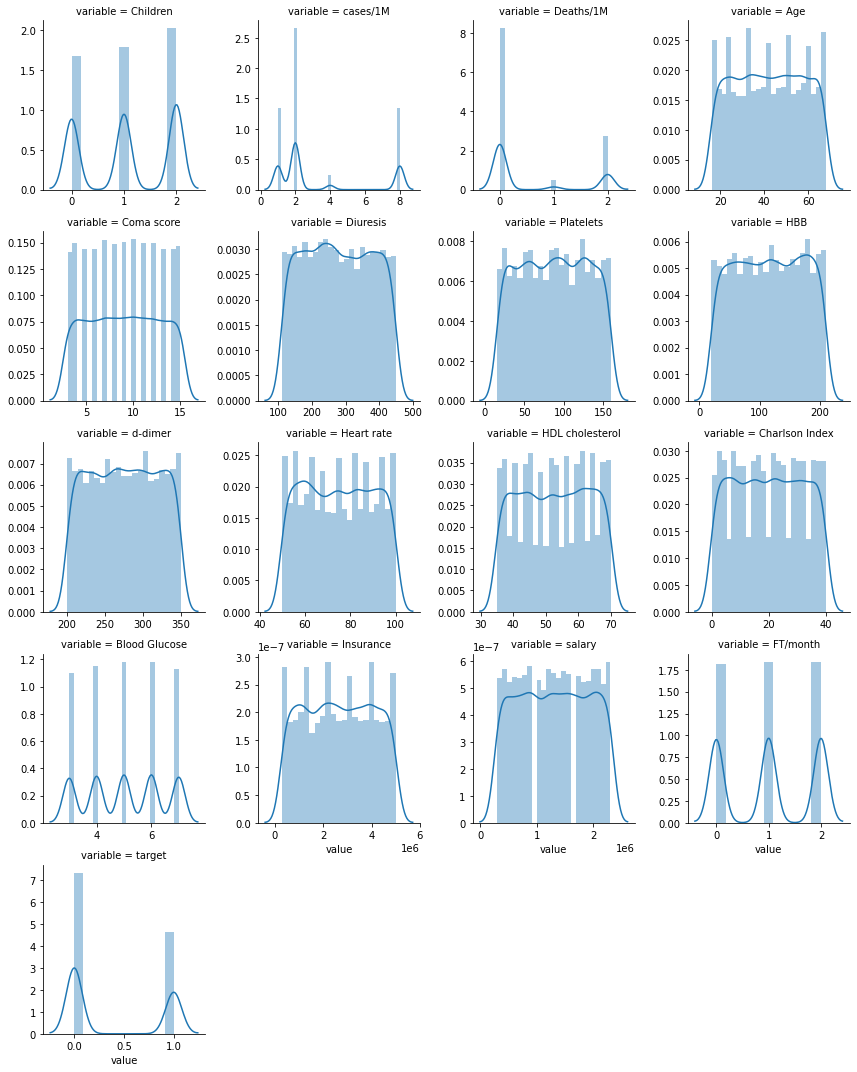

In [24]:
num= [f for f in df.columns if df.dtypes[f] != 'object']
nd = pd.melt(df, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

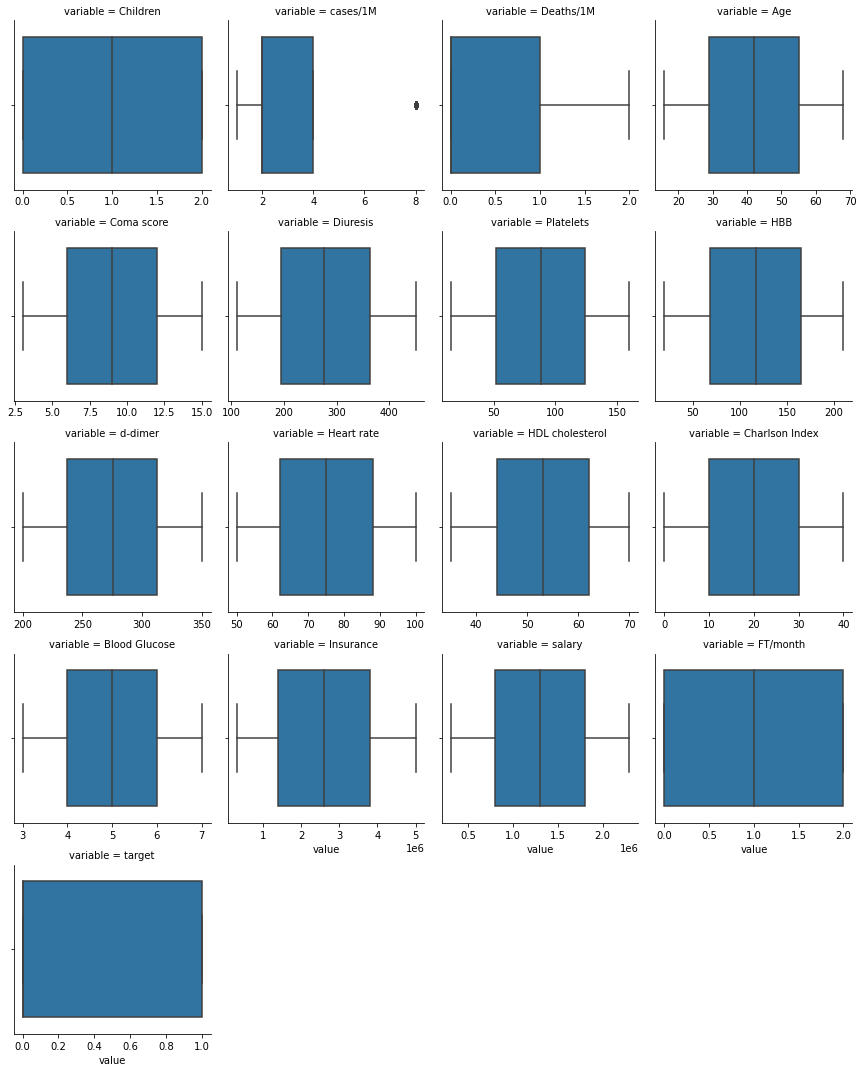

In [25]:
num= [f for f in df.columns if df.dtypes[f] != 'object']
nd = pd.melt(df, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.boxplot, 'value')
n1

### Bivariate analysis

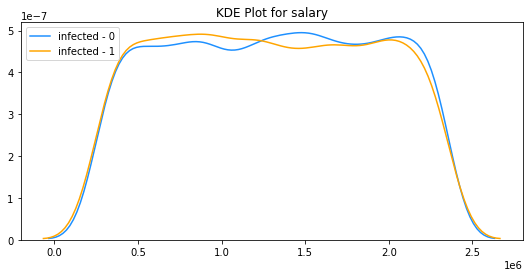

In [26]:
# KDE Plot Smoothens out even if there are no values for a value
def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title("KDE Plot for {}".format(feature))
    ax0 = sns.kdeplot(df[df['target'] == 0][feature].dropna(), color= 'dodgerblue', label= 'infected - 0')
    ax1 = sns.kdeplot(df[df['target'] == 1][feature].dropna(), color= 'orange', label= 'infected - 1')

kdeplot('salary')

#### people having low salary  have high chance to being infected and who having high salary have less chance for being infected

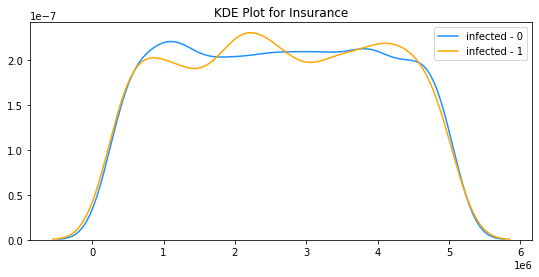

In [27]:
kdeplot("Insurance")

#### insurance have a lot of noise and its not clearly indicate any pattern

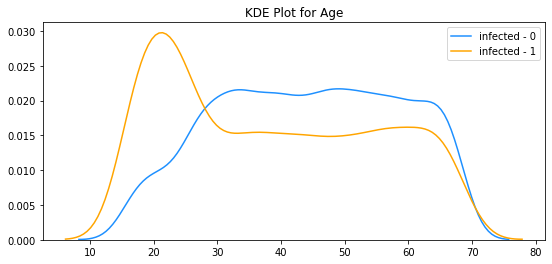

In [28]:
kdeplot("Age")

#### age clearly show people having less age have high chance for being infected

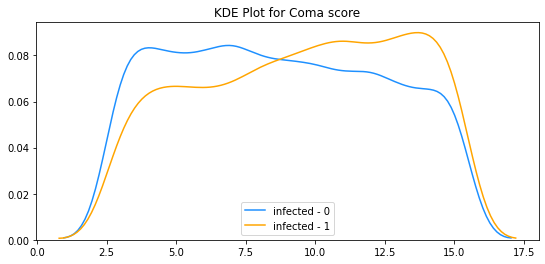

In [29]:
kdeplot("Coma score")

##### people having high coma score have high chance for being infected

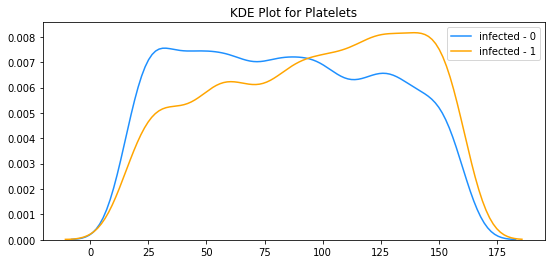

In [30]:
kdeplot("Platelets")

#### people having high Platelets have high chance for being infected

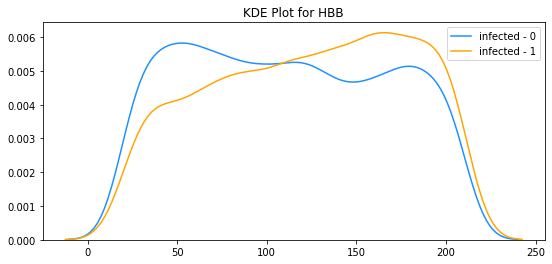

In [31]:
kdeplot("HBB")

##### people having high HBB have high chance for being infected.

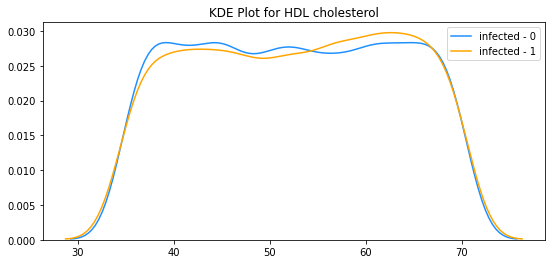

In [32]:
kdeplot("HDL cholesterol")

#### people having less cholesterol have low chance for being infected

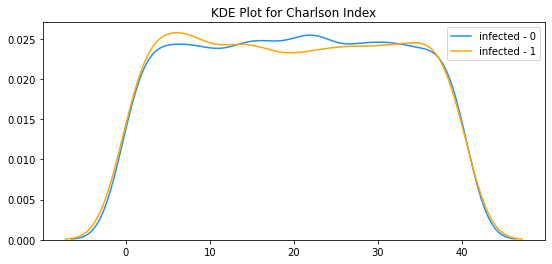

In [33]:
kdeplot("Charlson Index")

#### people have high charlson index having less chance for being infected

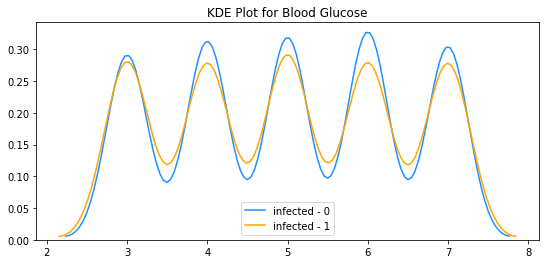

In [34]:
kdeplot("Blood Glucose")

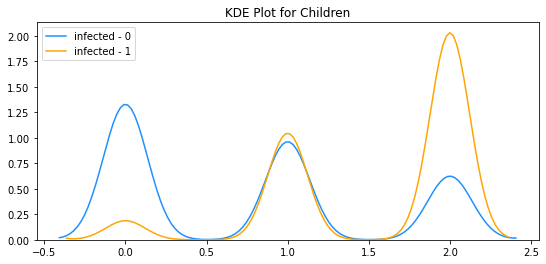

In [35]:
kdeplot("Children")

#### people having more than 1 children have high chance for being infected

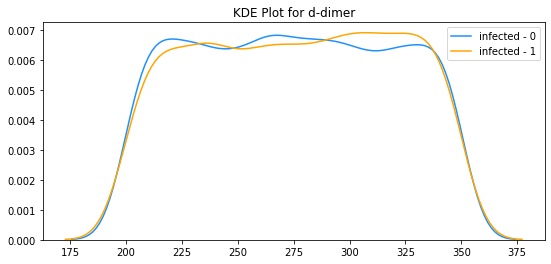

In [36]:
kdeplot("d-dimer")

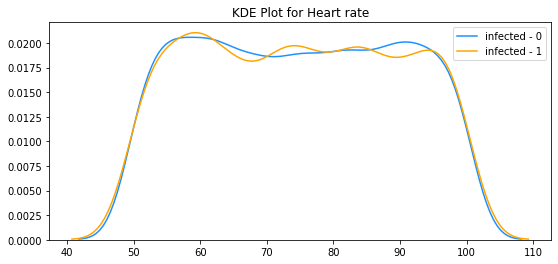

In [37]:
kdeplot("Heart rate")

#### both d-dimer and heart rate did not show any pattern 

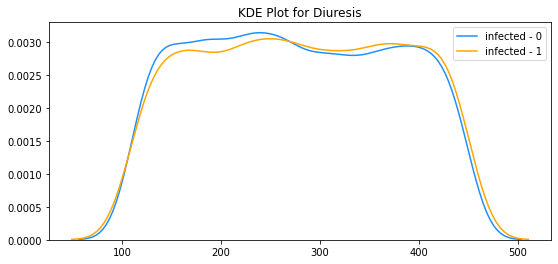

In [38]:
kdeplot("Diuresis")

#### people having low Diuresis have low chance for being infected.

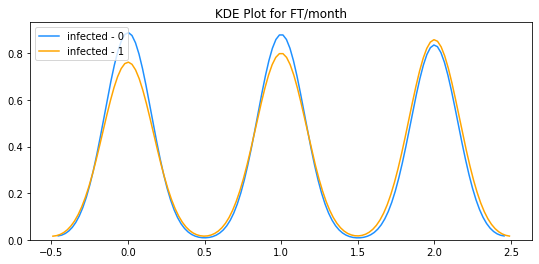

In [39]:
kdeplot("FT/month")

##### show people who gone for FT have slightly high chances for being infected.

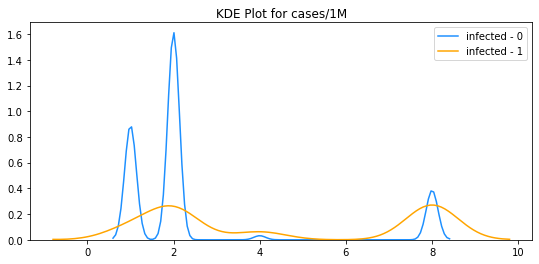

In [40]:
kdeplot("cases/1M")

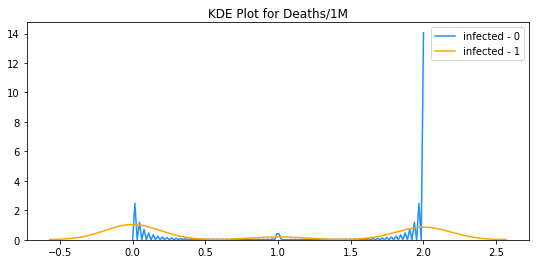

In [41]:
kdeplot("Deaths/1M")

# Categorical Variables

#### Uni and Bi-variate analysis and conformation with Chi-2 test

In [42]:
def barplot_percentages(feature):
    #fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 6))
    ax1 = df.groupby(feature)['target'].value_counts(normalize=True).unstack()
    ax1.plot(kind='bar', stacked='True')
    int_level = df[feature].value_counts()

    plt.figure(figsize=(8,4))
    sns.barplot(int_level.index, int_level.values, alpha=0.8, color=color[1])
    plt.ylabel('Number of Occurrences', fontsize=12)
    plt.xlabel(str(feature), fontsize=12)
    plt.show()

In [43]:
color = sns.color_palette()

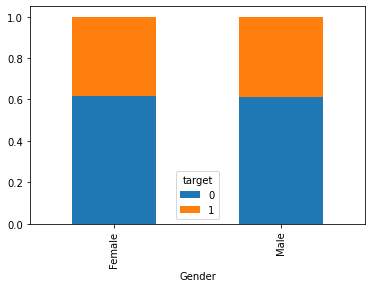

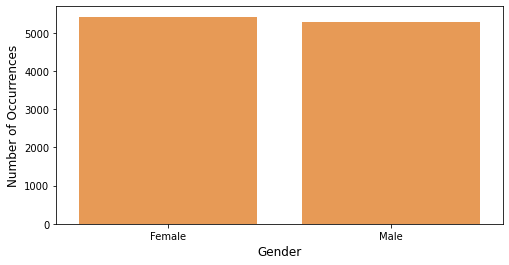

In [44]:
barplot_percentages("Gender")

In [45]:
df_table= pd.crosstab(df["Gender"], df["target"])
print(df_table)
val= stats.chi2_contingency(df_table)
val

target     0     1
Gender            
Female  3340  2083
Male    3229  2062


(0.332519376552364, 0.5641793402355504, 1, array([[3324.9661191, 2098.0338809],
        [3244.0338809, 2046.9661191]]))

#### p-value> 0.05 so gender has no impact on our target var.

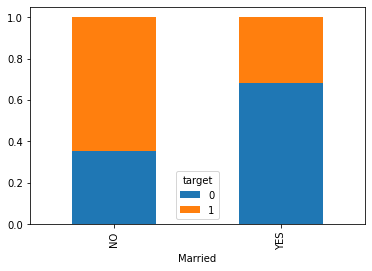

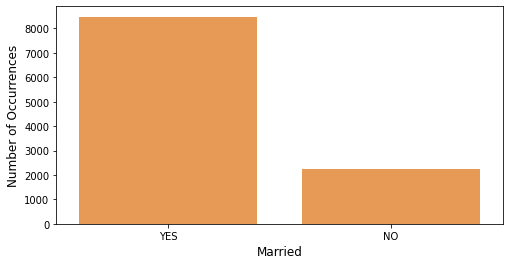

In [46]:
barplot_percentages("Married")

In [47]:
df_table= pd.crosstab(df["Married"], df["target"])
print(df_table)
val= stats.chi2_contingency(df_table)
val

target      0     1
Married            
NO        793  1440
YES      5776  2705


(790.2099449357631,
 7.254569318789687e-174,
 1,
 array([[1369.1036961,  863.8963039],
        [5199.8963039, 3281.1036961]]))

#### Married variable have significate impact on our target var

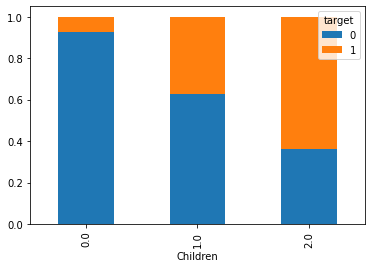

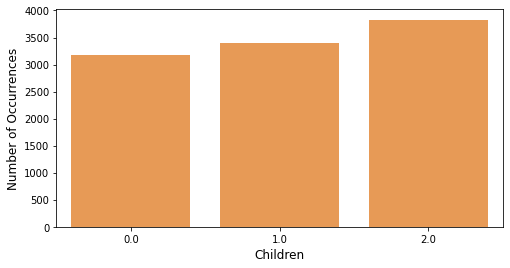

In [48]:
barplot_percentages("Children")

In [49]:
df_table= pd.crosstab(df["Children"], df["target"])
print(df_table)
val= stats.chi2_contingency(df_table)
val

target       0     1
Children            
0.0       2951   225
1.0       2136  1262
2.0       1386  2443


(2376.7364138836474, 0.0, 2, array([[1976.18456215, 1199.81543785],
        [2114.3183697 , 1283.6816303 ],
        [2382.49706815, 1446.50293185]]))

#### children variable have significate impact on our target var

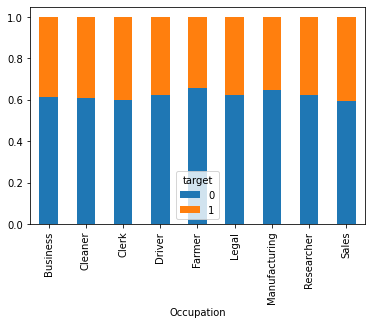

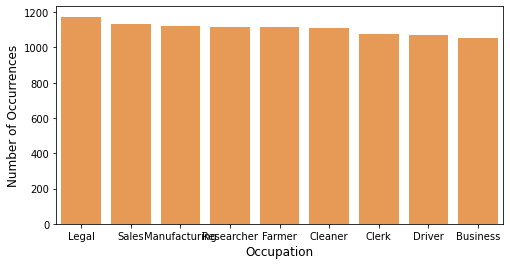

In [50]:
barplot_percentages("Occupation")

In [51]:
df_table= pd.crosstab(df["Occupation"], df["target"])
print(df_table)
val= stats.chi2_contingency(df_table)
val

target           0    1
Occupation             
Business       646  407
Cleaner        677  434
Clerk          647  431
Driver         668  404
Farmer         731  382
Legal          732  442
Manufacturing  723  397
Researcher     694  421
Sales          671  460


(15.549633447435955,
 0.04929902546057181,
 8,
 array([[653.85943614, 399.14056386],
        [689.8744858 , 421.1255142 ],
        [669.38316444, 408.61683556],
        [665.65746965, 406.34253035],
        [691.11638407, 421.88361593],
        [728.99428113, 445.00571887],
        [695.46302799, 424.53697201],
        [692.35828233, 422.64171767],
        [702.29346845, 428.70653155]]))

#### Occupation variable have low impact on our target var

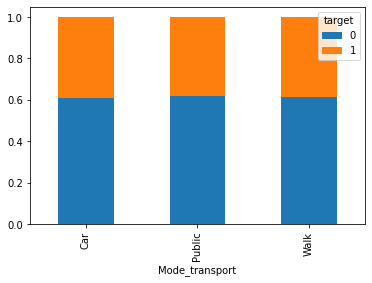

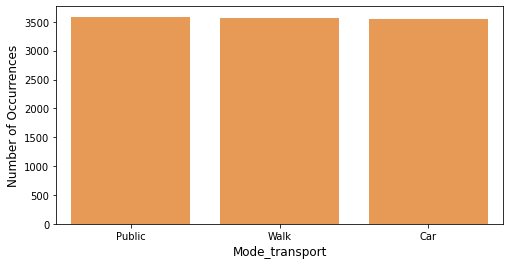

In [52]:
barplot_percentages("Mode_transport")

In [53]:
df_table= pd.crosstab(df["Mode_transport"], df["target"])
print(df_table)
val= stats.chi2_contingency(df_table)
val

target             0     1
Mode_transport            
Car             2159  1396
Public          2215  1373
Walk            2194  1374


(0.8220573856462422,
 0.6629679089068761,
 2,
 array([[2179.93091215, 1375.06908785],
        [2200.16655774, 1387.83344226],
        [2187.90253011, 1380.09746989]]))

#### p-value > 0.05 so Mode_transport have no impact on target var

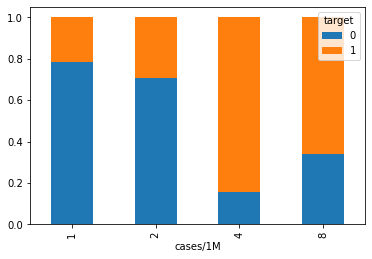

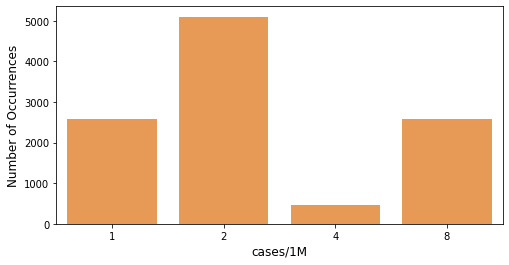

In [54]:
barplot_percentages("cases/1M")

In [55]:
df_table= pd.crosstab(df["cases/1M"], df["target"])
print(df_table)
val= stats.chi2_contingency(df_table)
val

target       0     1
cases/1M            
1         2019   562
2         3605  1495
4           72   388
8          873  1700


(1717.8516364449397, 0.0, 3, array([[1582.47050588,  998.52949412],
        [3126.92738473, 1973.07261527],
        [ 282.03658764,  177.96341236],
        [1577.56552175,  995.43447825]]))

#### cases/1M variable have significate impact on our target var

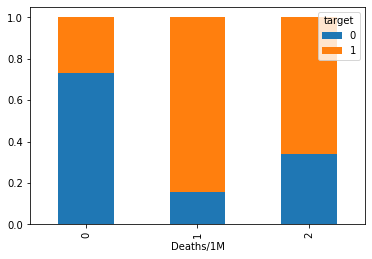

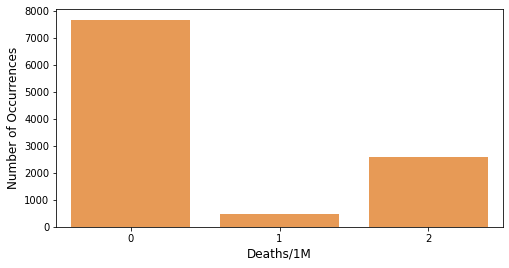

In [56]:
barplot_percentages("Deaths/1M")

In [57]:
df_table= pd.crosstab(df["Deaths/1M"], df["target"])
print(df_table)
val= stats.chi2_contingency(df_table)
val

target        0     1
Deaths/1M            
0          5624  2057
1            72   388
2           873  1700


(1676.7865561303352, 0.0, 2, array([[4709.39789061, 2971.60210939],
        [ 282.03658764,  177.96341236],
        [1577.56552175,  995.43447825]]))

#### Deaths/1M variable have significate impact on our target var

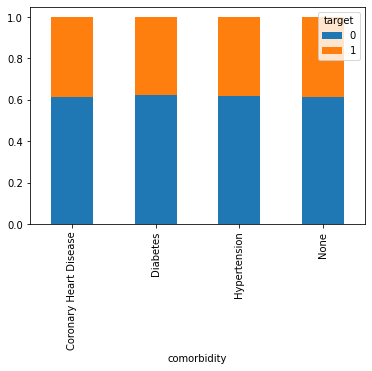

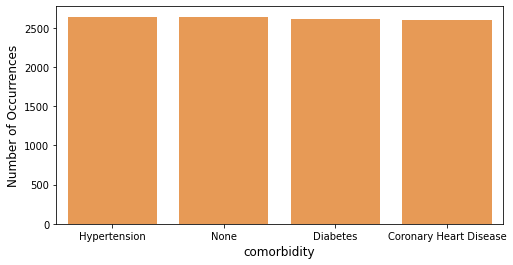

In [58]:
barplot_percentages("comorbidity")

In [59]:
df_table= pd.crosstab(df["comorbidity"], df["target"])
print(df_table)
val= stats.chi2_contingency(df_table)
val

target                     0     1
comorbidity                       
Coronary Heart Disease  1588  1007
Diabetes                1631   983
Hypertension            1637  1005
None                    1624  1013


(0.87390470885942,
 0.8317201945031467,
 3,
 array([[1603.3180778 ,  991.6819222 ],
        [1615.05720824,  998.94279176],
        [1632.35697941, 1009.64302059],
        [1629.26773455, 1007.73226545]]))

#### p-value > 0.05   clearly show blood comorbidity have no impact on target variable

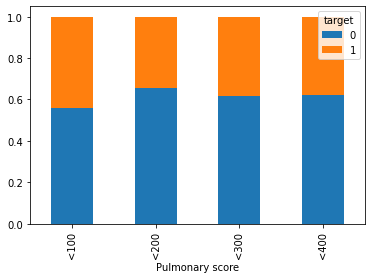

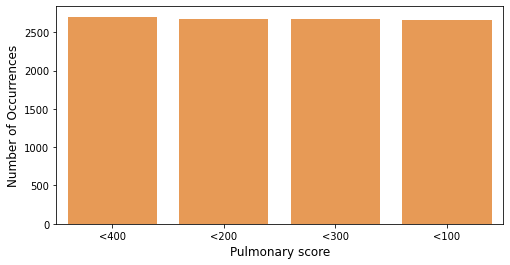

In [60]:
barplot_percentages("Pulmonary score")

In [61]:
df_table= pd.crosstab(df["Pulmonary score"], df["target"])
print(df_table)
val= stats.chi2_contingency(df_table)
val

target              0     1
Pulmonary score            
<100             1489  1175
<200             1748   929
<300             1653  1018
<400             1679  1023


(52.04857563160297,
 2.924527773828227e-11,
 3,
 array([[1633.35971626, 1030.64028374],
        [1641.33031548, 1035.66968452],
        [1637.65157738, 1033.34842262],
        [1656.65839089, 1045.34160911]]))

#### Pulmonary score variable have significate impact on our target var

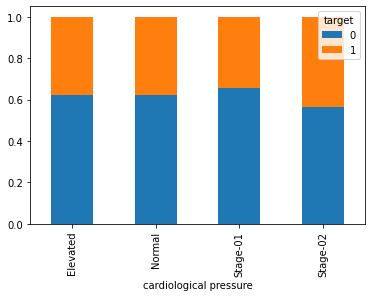

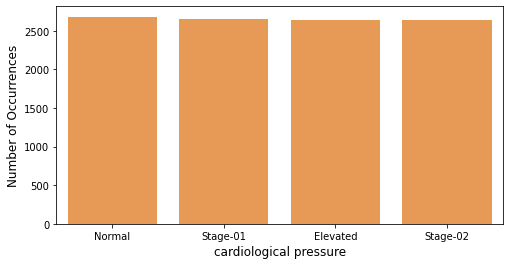

In [62]:
barplot_percentages("cardiological pressure")

In [63]:
df_table= pd.crosstab(df["cardiological pressure"], df["target"])
print(df_table)
val= stats.chi2_contingency(df_table)
val

target                     0     1
cardiological pressure            
Elevated                1639  1002
Normal                  1672  1009
Stage-01                1736   921
Stage-02                1486  1152


(47.49989686261179,
 2.720728774129048e-10,
 3,
 array([[1625.09682585, 1015.90317415],
        [1649.71018178, 1031.28981822],
        [1634.94216822, 1022.05783178],
        [1623.25082415, 1014.74917585]]))

#### cardiological pressure variable have significate impact on our target var

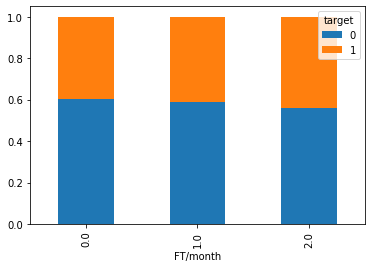

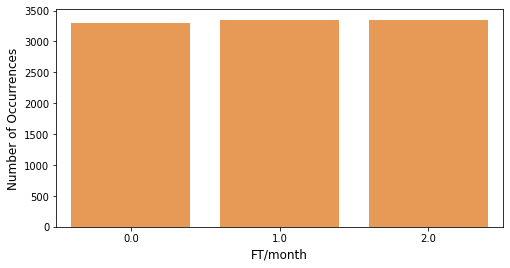

In [64]:
barplot_percentages("FT/month")

In [65]:
df_table= pd.crosstab(df["FT/month"], df["target"])
print(df_table)
val= stats.chi2_contingency(df_table)
val

target       0     1
FT/month            
0.0       1993  1304
1.0       1979  1372
2.0       1874  1469


(13.802243540419681,
 0.0010066555592219313,
 2,
 array([[1929.1624462 , 1367.8375538 ],
        [1960.75928336, 1390.24071664],
        [1956.07827044, 1386.92172956]]))

#### FT/month have impact on target variable

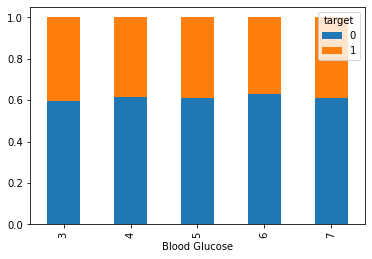

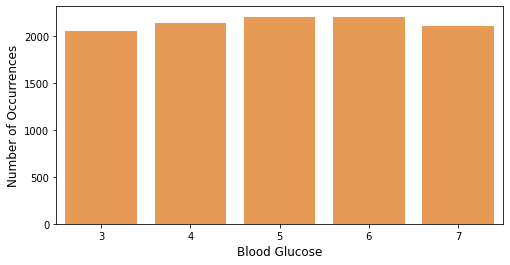

In [66]:
barplot_percentages("Blood Glucose")

In [67]:
df_table= pd.crosstab(df["Blood Glucose"], df["target"])
print(df_table)
val= stats.chi2_contingency(df_table)
val

target            0    1
Blood Glucose           
3              1230  827
4              1321  819
5              1348  859
6              1384  821
7              1286  819


(4.210272075247788,
 0.3782959282217243,
 4,
 array([[1261.19404517,  795.80595483],
        [1312.08325555,  827.91674445],
        [1353.16249767,  853.83750233],
        [1351.93625163,  853.06374837],
        [1290.62394997,  814.37605003]]))

#### p-value > 0.05      clearly show blood glucose have no impact on target variable

In [68]:
df.drop(['Heart rate', 'd-dimer','Occupation', 'Insurance', 'Blood Glucose', 'comorbidity', 'Mode_transport', 'Gender'], axis=1, inplace=True)
test.drop(['Heart rate', 'd-dimer','Occupation', 'Insurance', 'Blood Glucose', 'comorbidity', 'Mode_transport', 'Gender'], axis=1, inplace=True)

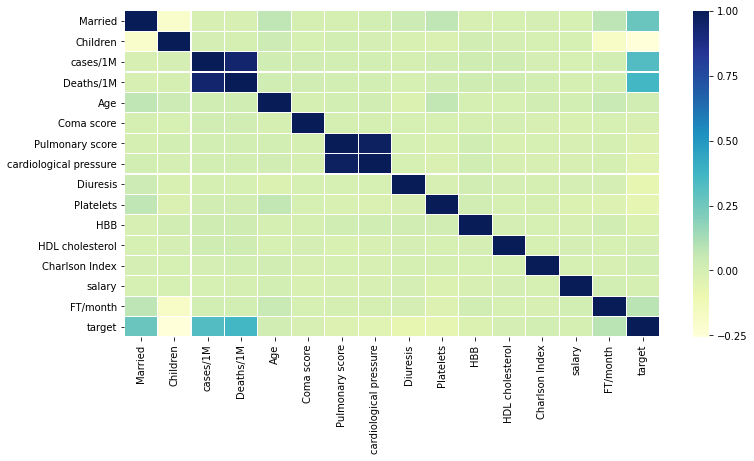

In [69]:
plt.figure(figsize=(12, 6))
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu")

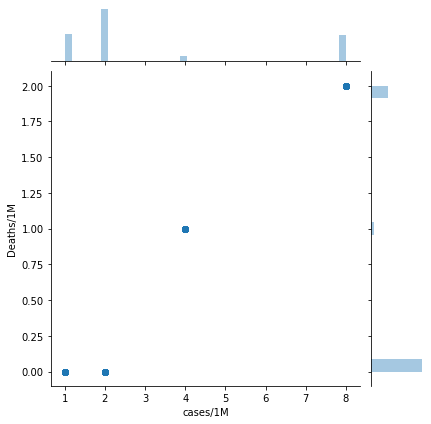

In [70]:
sns.jointplot(x=df["cases/1M"], y=df["Deaths/1M"])

#### deaths directly correlated with cases and Pulmonary score correlated with cardiological pressure

In [71]:
df["case_deaths"]=df["cases/1M"]+df["Deaths/1M"]
test["case_deaths"]=test["cases/1M"]+test["Deaths/1M"]

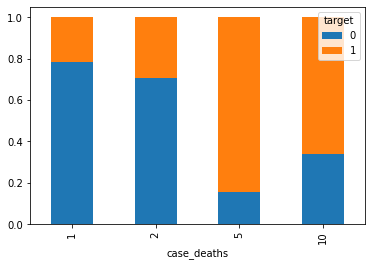

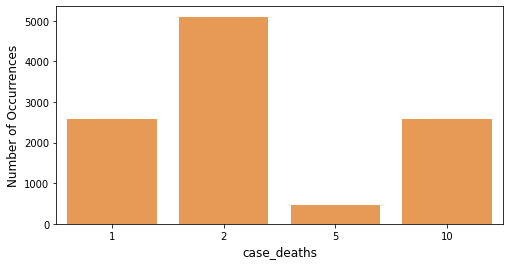

In [72]:
barplot_percentages("case_deaths")

In [73]:
df_table= pd.crosstab(df["case_deaths"], df["target"])
print(df_table)
val= stats.chi2_contingency(df_table)
val

target          0     1
case_deaths            
1            2019   562
2            3605  1495
5              72   388
10            873  1700


(1717.8516364449397, 0.0, 3, array([[1582.47050588,  998.52949412],
        [3126.92738473, 1973.07261527],
        [ 282.03658764,  177.96341236],
        [1577.56552175,  995.43447825]]))

In [74]:
df.drop(['cases/1M', 'Deaths/1M', 'cardiological pressure'], axis=1, inplace=True)
test.drop(['cases/1M', 'Deaths/1M', 'cardiological pressure'], axis=1, inplace=True)

#### Dealing with Missing value

In [75]:
df[df['Married']=="NO"]["Children"].value_counts()

2.0    789
1.0    728
0.0    405
Name: Children, dtype: int64

In [76]:
df.loc[df.Married == "NO", "Children"] = 0.0

In [77]:
df["Children"].fillna(0, inplace=True)

In [78]:
df['HBB'].fillna(method= "pad", axis=0, inplace=True)
df['Platelets'].fillna(method= "pad", axis=0, inplace=True)
df['Diuresis'].fillna(method= "pad", axis=0, inplace=True)
df['FT/month'].fillna(method= "pad", axis=0, inplace=True)
df['HDL cholesterol'].fillna(method= "pad", axis=0, inplace=True)

In [79]:
df.isnull().sum()

Married            0
Children           0
Age                0
Coma score         0
Pulmonary score    0
Diuresis           0
Platelets          0
HBB                0
HDL cholesterol    0
Charlson Index     0
salary             0
FT/month           0
target             0
case_deaths        0
dtype: int64

In [80]:
df=pd.get_dummies(data=df, drop_first=True)
test=pd.get_dummies(data=test, drop_first=True)

In [81]:
df

,Children,Age,Coma score,Diuresis,Platelets,HBB,HDL cholesterol,Charlson Index,salary,FT/month,target,case_deaths,Married_YES,Pulmonary score_<200,Pulmonary score_<300,Pulmonary score_<400
0,1.0,68,8,441.0,154.0,93.0,58.0,27,1300000,2.0,0,2,1,0,0,1
1,2.0,64,15,441.0,121.0,56.0,68.0,5,400000,1.0,1,2,1,0,0,0
2,0.0,19,13,416.0,124.0,137.0,43.0,40,900000,1.0,1,2,0,0,1,0
3,1.0,33,9,410.0,98.0,167.0,60.0,27,2300000,1.0,0,2,1,1,0,0
4,0.0,23,7,390.0,21.0,153.0,64.0,32,1100000,1.0,1,2,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10709,0.0,20,14,134.0,67.0,24.0,56.0,35,300000,0.0,0,10,0,0,0,1
10710,0.0,42,4,387.0,102.0,134.0,47.0,35,700000,0.0,0,10,1,0,0,1
10711,0.0,59,3,177.0,111.0,151.0,37.0,16,2100000,2.0,0,10,1,0,0,0
10712,1.0,49,6,352.0,140.0,110.0,70.0,28,700000,1.0,1,10,1,0,1,0


In [82]:
df.columns=["Children",'Age','Coma_score',"Diuresis", 'Platelets', 'HBB', 'HDL_cholesterol', 'Charlson_Index', 'salary', 'FT_month', 'target', 'case_deaths', 'Married_YES', 'Pulmonary_score_upto200','Pulmonary_score_upto300','Pulmonary_score_upto400']

In [83]:
test.columns=["people_ID","Children",'Age','Coma_score',"Diuresis", 'Platelets', 'HBB', 'HDL_cholesterol', 'Charlson_Index', 'salary', 'FT_month', 'case_deaths', 'Married_YES', 'Pulmonary_score_upto200','Pulmonary_score_upto300','Pulmonary_score_upto400']

## LogisticRegression classifier

In [84]:
df1=df.copy()

In [85]:
x = df1.loc[:, df.columns != 'target']
y = df1.loc[:,'target']

In [86]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.25, random_state=0, stratify=y)

In [87]:
std = StandardScaler()
x_train =std.fit_transform(x_train)
x_test= std.transform(x_test)

In [88]:
model = LogisticRegression(penalty='l2')
model.fit(x_train,y_train)
pred = model.predict_proba(x_test)[:,1]

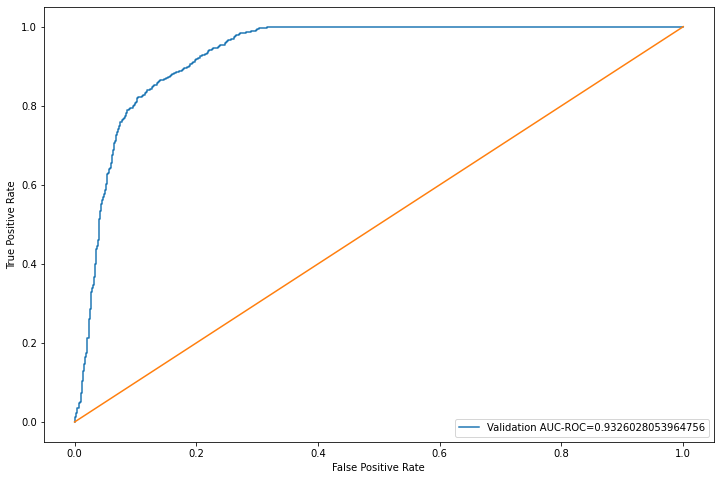

In [89]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test,pred) 
auc = roc_auc_score(y_test, pred) 
plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="Validation AUC-ROC="+str(auc)) 
x = np.linspace(0, 1, 1000)
plt.plot(x, x, linestyle='-')
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.show()

In [90]:
# Confusion Matrix
pred_val = model.predict(x_test)

In [91]:
label_preds = pred_val
cm = confusion_matrix(y_test,label_preds)
print(cm)

[[1446  197]
 [ 167  869]]


In [92]:
print(classification_report(y_test,pred_val))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      1643
           1       0.82      0.84      0.83      1036

    accuracy                           0.86      2679
   macro avg       0.86      0.86      0.86      2679
weighted avg       0.87      0.86      0.86      2679



#### cross validation

In [93]:
kfold=KFold(n_splits=5, random_state=7)

In [94]:
result= cross_val_score(model, x_train, y_train, cv=kfold, scoring='roc_auc')
print(result.mean())

0.9297143532520069


## Random Forest Classifier

In [95]:
df2=df.copy()

In [96]:
x = df2.loc[:, df.columns != 'target']
y = df2.loc[:,'target']

In [97]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.25, random_state=0, stratify=y)

In [98]:
std = StandardScaler()
x_train =std.fit_transform(x_train)
x_test= std.transform(x_test)

In [99]:
from sklearn.ensemble import RandomForestClassifier

In [100]:
clf = RandomForestClassifier(random_state=1)
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [101]:
pred=clf.predict_proba(x_test)[:,1]

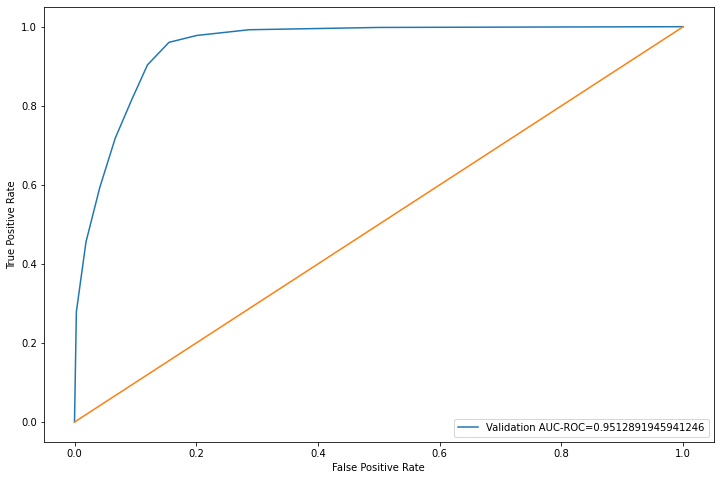

In [102]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test,pred) 
auc = roc_auc_score(y_test, pred) 
plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="Validation AUC-ROC="+str(auc)) 
x = np.linspace(0, 1, 1000)
plt.plot(x, x, linestyle='-')
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.show()

In [103]:
pred_val = clf.predict(x_test)

In [104]:
label_preds = pred_val
cm = confusion_matrix(y_test,label_preds)
print(cm)

[[1488  155]
 [ 190  846]]


In [105]:
print(classification_report(y_test,pred_val))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1643
           1       0.85      0.82      0.83      1036

    accuracy                           0.87      2679
   macro avg       0.87      0.86      0.86      2679
weighted avg       0.87      0.87      0.87      2679



In [106]:
kfold=KFold(n_splits=5, random_state=7)

In [107]:
result= cross_val_score(clf, x_train, y_train, cv=kfold, scoring='roc_auc')
print(result.mean())

0.9464560386744634


## Decision Tree Classifier

In [108]:
df3=df.copy()

In [109]:
x = df3.loc[:, df.columns != 'target']
y = df3.loc[:,'target']

In [110]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.25, random_state=0, stratify=y)

In [111]:
std = StandardScaler()
x_train =std.fit_transform(x_train)
x_test= std.transform(x_test)

In [112]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [113]:
pred_val = clf.predict(x_test)

In [114]:
pred=clf.predict_proba(x_test)[:,1]

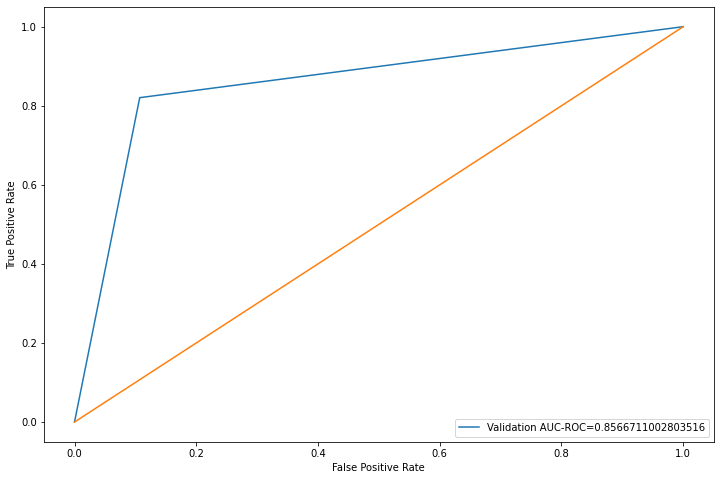

In [115]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test,pred) 
auc = roc_auc_score(y_test, pred) 
plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="Validation AUC-ROC="+str(auc)) 
x = np.linspace(0, 1, 1000)
plt.plot(x, x, linestyle='-')
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.show()

In [116]:
print(confusion_matrix(y_test,pred_val))

[[1467  176]
 [ 186  850]]


In [117]:
print(classification_report(y_test,pred_val))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1643
           1       0.83      0.82      0.82      1036

    accuracy                           0.86      2679
   macro avg       0.86      0.86      0.86      2679
weighted avg       0.86      0.86      0.86      2679



In [118]:
kfold=KFold(n_splits=5, random_state=7)

In [119]:
result= cross_val_score(clf, x_train, y_train, cv=kfold, scoring='roc_auc')
print(result.mean())

0.845179236754381


## XGBoost Classification

In [120]:
df4=df.copy()

In [121]:
x = df4.loc[:, df.columns != 'target']
y = df4.loc[:,'target']

In [122]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.25, random_state=0, stratify=y)

In [123]:
from xgboost import XGBClassifier
xgboost = XGBClassifier()
xgboost.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [124]:
xg_pred = xgboost.predict(x_test)

In [125]:
print(confusion_matrix(y_test,xg_pred))

[[1469  174]
 [ 107  929]]


In [126]:
print(classification_report(y_test,xg_pred))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91      1643
           1       0.84      0.90      0.87      1036

    accuracy                           0.90      2679
   macro avg       0.89      0.90      0.89      2679
weighted avg       0.90      0.90      0.90      2679



In [127]:
pred=xgboost.predict_proba(x_test)[:,1]

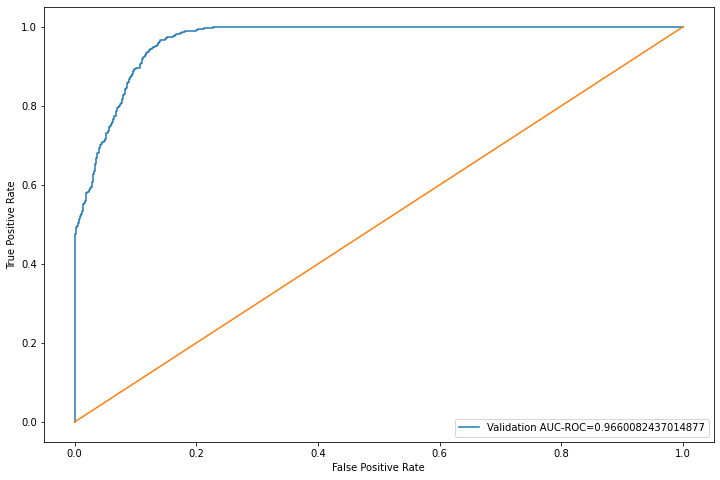

In [128]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test,pred) 
auc = roc_auc_score(y_test, pred) 
plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="Validation AUC-ROC="+str(auc)) 
x = np.linspace(0, 1, 1000)
plt.plot(x, x, linestyle='-')
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.show()

In [129]:
kfold=KFold(n_splits=5, random_state=7)

In [130]:
result= cross_val_score(xgboost, x_train, y_train, cv=kfold, scoring='roc_auc')
print(result.mean())

0.9643387524825228


In [131]:
# Create XGB Classifier object
xgb_clf = XGBClassifier(tree_method = "exact", predictor = "cpu_predictor", objective = 'binary:logistic')
# Create parameter grid
parameters = {"learning_rate": [0.1, 0.01, 0.001], "gamma" : [0.01, 0.1, 0.3, 0.5, 1, 1.5, 2], "max_depth": [2, 4, 7, 10], "colsample_bytree": [0.3, 0.6, 0.8, 1.0], "subsample": [0.2, 0.4, 0.5, 0.6, 0.7], "reg_alpha": [0, 0.5, 1], "reg_lambda": [1, 1.5, 2, 3, 4.5], "min_child_weight": [1, 3, 5, 7], "n_estimators": [100, 250, 500, 1000]} 
from sklearn.model_selection import RandomizedSearchCV
# Create RandomizedSearchCV Object
xgb_rscv = RandomizedSearchCV(xgb_clf, param_distributions = parameters, scoring = "roc_auc", cv = 10, verbose = 3, random_state = 40 ) 
# Fit the model
model_xgboost = xgb_rscv.fit(x_train, y_train) 
# Model best estimators
print("Learning Rate: ", model_xgboost.best_estimator_.get_params()["learning_rate"])
print("Gamma: ", model_xgboost.best_estimator_.get_params()["gamma"])
print("Max Depth: ", model_xgboost.best_estimator_.get_params()["max_depth"])
print("Subsample: ", model_xgboost.best_estimator_.get_params()["subsample"])
print("Max Features at Split: ", model_xgboost.best_estimator_.get_params()["colsample_bytree"])
print("Alpha: ", model_xgboost.best_estimator_.get_params()["reg_alpha"])
print("Lamda: ", model_xgboost.best_estimator_.get_params()["reg_lambda"])
print("Minimum Sum of the Instance Weight Hessian to Make a Child: ", model_xgboost.best_estimator_.get_params()["min_child_weight"])
print("Number of Trees: ", model_xgboost.best_estimator_.get_params()["n_estimators"])

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] subsample=0.6, reg_lambda=1, reg_alpha=0, n_estimators=100, min_child_weight=5, max_depth=2, learning_rate=0.1, gamma=1.5, colsample_bytree=1.0 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  subsample=0.6, reg_lambda=1, reg_alpha=0, n_estimators=100, min_child_weight=5, max_depth=2, learning_rate=0.1, gamma=1.5, colsample_bytree=1.0, score=0.961, total=   0.4s
[CV] subsample=0.6, reg_lambda=1, reg_alpha=0, n_estimators=100, min_child_weight=5, max_depth=2, learning_rate=0.1, gamma=1.5, colsample_bytree=1.0 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  subsample=0.6, reg_lambda=1, reg_alpha=0, n_estimators=100, min_child_weight=5, max_depth=2, learning_rate=0.1, gamma=1.5, colsample_bytree=1.0, score=0.964, total=   0.4s
[CV] subsample=0.6, reg_lambda=1, reg_alpha=0, n_estimators=100, min_child_weight=5, max_depth=2, learning_rate=0.1, gamma=1.5, colsample_bytree=1.0 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


[CV]  subsample=0.6, reg_lambda=1, reg_alpha=0, n_estimators=100, min_child_weight=5, max_depth=2, learning_rate=0.1, gamma=1.5, colsample_bytree=1.0, score=0.948, total=   0.4s
[CV] subsample=0.6, reg_lambda=1, reg_alpha=0, n_estimators=100, min_child_weight=5, max_depth=2, learning_rate=0.1, gamma=1.5, colsample_bytree=1.0 
[CV]  subsample=0.6, reg_lambda=1, reg_alpha=0, n_estimators=100, min_child_weight=5, max_depth=2, learning_rate=0.1, gamma=1.5, colsample_bytree=1.0, score=0.955, total=   0.4s
[CV] subsample=0.6, reg_lambda=1, reg_alpha=0, n_estimators=100, min_child_weight=5, max_depth=2, learning_rate=0.1, gamma=1.5, colsample_bytree=1.0 
[CV]  subsample=0.6, reg_lambda=1, reg_alpha=0, n_estimators=100, min_child_weight=5, max_depth=2, learning_rate=0.1, gamma=1.5, colsample_bytree=1.0, score=0.958, total=   0.4s
[CV] subsample=0.6, reg_lambda=1, reg_alpha=0, n_estimators=100, min_child_weight=5, max_depth=2, learning_rate=0.1, gamma=1.5, colsample_bytree=1.0 
[CV]  subsample=

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  3.4min finished


Learning Rate:  0.01
Gamma:  0.3
Max Depth:  7
Subsample:  0.4
Max Features at Split:  0.6
Alpha:  0
Lamda:  1.5
Minimum Sum of the Instance Weight Hessian to Make a Child:  1
Number of Trees:  1000


# For Test Dataset

In [133]:
Test=test.loc[:,test.columns != 'people_ID']

In [134]:
clf=XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.01, max_delta_step=0, max_depth=7,
              min_child_weight=1, monotone_constraints=None,
              n_estimators=1000, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', predictor='cpu_predictor',
              random_state=0, reg_alpha=0, reg_lambda=1.5, scale_pos_weight=1,
              subsample=0.4, tree_method='exact', validate_parameters=False,
              verbosity=None)

In [135]:
clf.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.01, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', predictor='cpu_predictor',
              random_state=0, reg_alpha=0, reg_lambda=1.5, scale_pos_weight=1,
              subsample=0.4, tree_method='exact', validate_parameters=False,
              verbosity=None)

In [136]:
test_prediction= clf.predict_proba(Test)[:,1]

In [137]:
test_pred = pd.DataFrame(test_prediction, columns= ['Infected_prob'])

In [138]:
new_test = pd.concat([test, test_pred], axis=1, join='inner')

In [139]:
data= new_test[['people_ID' ,'Infected_prob']]

In [140]:
data.head(5)

,people_ID,Infected_prob
0,5942,0.976699
1,18664,0.985471
2,5603,0.989006
3,5649,0.982636
4,5099,0.976488


In [141]:
data.to_csv('predictions.csv' , index=False)